### Entendendo o Problema

Vamos construir uma máquina preditiva de detecção de fraudes em transferências bancárias. 

Os dados são ficticios e possuem transferências entre a própria instituição 

Temos mais de 200 mil registros para analisar, sendo 490 fraudulentos. 

Importando as bibliotecas para Analise

In [ ]:
#bibliotecas usadas
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#bibliotecas utilizadas no pré processamento dos dados
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

#biliotecas utilizadas na construções de máquinas preditivas
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

#bibliotecas utilizadas na avaliação das máquinas
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


In [ ]:
#lendo os dados
dados = pd.read_csv('./transferencias.csv')

In [ ]:
#verificando atributos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29798 entries, 0 to 29797
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        29798 non-null  int64  
 1   pais             29798 non-null  float64
 2   cidade           29798 non-null  float64
 3   bairro           29798 non-null  float64
 4   cep              29798 non-null  float64
 5   ip               29798 non-null  float64
 6   dia              29798 non-null  float64
 7   hora             29798 non-null  float64
 8   minuto           29798 non-null  float64
 9   so               29798 non-null  float64
 10  valor            29798 non-null  float64
 11  antecedentes     29798 non-null  float64
 12  reclamacoes      29798 non-null  float64
 13  qtd_trans        29798 non-null  float64
 14  crt              29798 non-null  float64
 15  limite_global    29798 non-null  float64
 16  tipo_crt         29798 non-null  float64
 17  estabelecime

In [ ]:
#verificando dados
dados.head()

,Timestamp,pais,cidade,bairro,cep,ip,dia,hora,minuto,so,...,android,ios,compras,hist_navegacao,relacionamento,ind_seguranca,tempo_transacao,lim_crt,hist_saldo,Target
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
#verificando valores missing
dados.isna().sum()

Timestamp          0
pais               0
cidade             0
bairro             0
cep                0
ip                 0
dia                0
hora               0
minuto             0
so                 0
valor              0
antecedentes       0
reclamacoes        0
qtd_trans          0
crt                0
limite_global      0
tipo_crt           0
estabelecimento    0
contas             0
emprestimos        0
navegador          0
android            0
ios                0
compras            0
hist_navegacao     0
relacionamento     0
ind_seguranca      0
tempo_transacao    0
lim_crt            0
hist_saldo         1
Target             1
dtype: int64

In [ ]:
#elimininando dados missing
dados.dropna(inplace=True)

<Figure size 720x432 with 0 Axes>

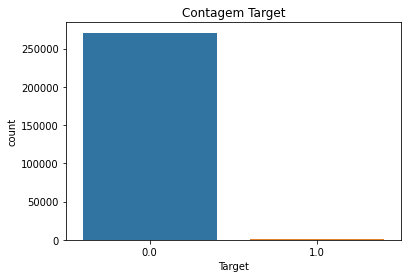

<Figure size 720x432 with 0 Axes>

In [ ]:
dados['Target'].value_counts()
sns.countplot(dados['Target'])
plt.title('Contagem Target')
plt.figure(figsize=(10,6))


In [ ]:
dados.corr()['Target'].sort_values(ascending=False)

Target             1.000000
antecedentes       0.158260
cep                0.136813
cidade             0.094791
android            0.042182
emprestimos        0.035178
minuto             0.021704
navegador          0.020172
tempo_transacao    0.017371
lim_crt            0.009401
hist_saldo         0.005438
ind_seguranca      0.004243
relacionamento     0.003232
ios                0.000486
compras           -0.003329
qtd_trans         -0.004088
limite_global     -0.004843
hist_navegacao    -0.007717
Timestamp         -0.011444
dia               -0.044860
ip                -0.099492
so                -0.100121
pais              -0.104129
contas            -0.114797
hora              -0.195435
bairro            -0.199865
tipo_crt          -0.201817
valor             -0.223620
reclamacoes       -0.264379
crt               -0.309810
estabelecimento   -0.334940
Name: Target, dtype: float64

In [ ]:
dados.corr(method='spearman')

,Timestamp,pais,cidade,bairro,cep,ip,dia,hora,minuto,so,...,android,ios,compras,hist_navegacao,relacionamento,ind_seguranca,tempo_transacao,lim_crt,hist_saldo,Target
Timestamp,1.000000,0.196974,-0.022569,-0.469325,-0.141232,0.220206,-0.106568,0.112281,-0.109051,0.017081,...,0.103059,0.138779,0.146759,-0.014618,-0.255336,-0.003812,-0.038717,-0.145161,-0.027865,-0.010745
pais,0.196974,1.000000,-0.377441,-0.415476,0.094098,-0.107563,-0.087481,-0.230557,-0.230598,0.133882,...,-0.061827,-0.028704,0.138451,-0.000847,0.059185,0.004842,-0.102741,-0.204439,-0.088708,-0.043310
cidade,-0.022569,-0.377441,1.000000,0.080980,0.164766,0.343036,-0.108160,0.426682,0.001955,-0.074463,...,-0.100043,-0.059243,-0.090456,0.014120,-0.089264,0.033158,0.127682,0.131619,-0.504227,0.052777
bairro,-0.469325,-0.415476,0.080980,1.000000,0.061961,-0.219638,0.165440,-0.071360,0.165145,-0.027659,...,-0.038245,0.010491,-0.134588,0.002385,0.025575,-0.012996,0.140592,0.176626,-0.006805,-0.060392
cep,-0.141232,0.094098,0.164766,0.061961,1.000000,0.025188,0.076316,0.063237,-0.005356,0.105781,...,0.038404,-0.004763,0.008258,-0.009347,0.060119,-0.064316,-0.029776,0.009029,-0.026608,0.064222
ip,0.220206,-0.107563,0.343036,-0.219638,0.025188,1.000000,-0.005833,0.427495,-0.056358,-0.051823,...,-0.041128,-0.010374,-0.105104,-0.026804,-0.015788,0.025060,0.011167,-0.030964,-0.314128,-0.030942
dia,-0.106568,-0.087481,-0.108160,0.165440,0.076316,-0.005833,1.000000,-0.288754,0.446143,0.032052,...,0.037096,0.043850,-0.054280,-0.141757,-0.010198,-0.022926,0.075360,0.020279,0.204174,-0.039554
hora,0.112281,-0.230557,0.426682,-0.071360,0.063237,0.427495,-0.288754,1.000000,-0.390969,-0.096210,...,-0.023270,-0.024454,-0.179373,-0.012450,-0.050987,0.013677,-0.099307,0.054021,-0.026378,-0.049070
minuto,-0.109051,-0.230598,0.001955,0.165145,-0.005356,-0.056358,0.446143,-0.390969,1.000000,-0.001290,...,0.077540,0.022085,0.074696,-0.026572,-0.073747,-0.005132,0.191183,0.087830,0.003509,0.023315
so,0.017081,0.133882,-0.074463,-0.027659,0.105781,-0.051823,0.032052,-0.096210,-0.001290,1.000000,...,-0.064110,0.005738,0.066309,-0.000772,-0.017825,0.029649,-0.002849,-0.102527,-0.075629,-0.050520


In [ ]:
#estatistica descritiva das variaveis
dados.describe()

,Timestamp,pais,cidade,bairro,cep,ip,dia,hora,minuto,so,...,android,ios,compras,hist_navegacao,relacionamento,ind_seguranca,tempo_transacao,lim_crt,hist_saldo,Target
count,271285.000000,271285.000000,271285.000000,271285.000000,271285.000000,271285.000000,271285.000000,271285.000000,271285.000000,271285.000000,...,271285.000000,271285.000000,271285.000000,271285.000000,271285.000000,271285.000000,271285.000000,271285.000000,271285.000000,271285.000000
mean,91155.242247,-0.007925,-0.012539,0.037678,0.008089,-0.014806,0.006581,-0.006756,-0.000099,-0.000009,...,-0.000183,-0.003791,-0.001803,0.000704,0.007350,0.000476,-0.000280,0.000521,89.313067,0.001773
std,45665.325961,1.957298,1.654709,1.510332,1.415859,1.366696,1.324918,1.219122,1.191946,1.103042,...,0.736957,0.722707,0.629698,0.605759,0.518715,0.483536,0.398945,0.331817,247.442691,0.042070
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,52708.000000,-0.922530,-0.606529,-0.829408,-0.846262,-0.706914,-0.761365,-0.558847,-0.206497,-0.648344,...,-0.226946,-0.538609,-0.162889,-0.352713,-0.308340,-0.328181,-0.070686,-0.052066,5.930000,0.000000
50%,81338.000000,0.018393,0.059974,0.226375,-0.006704,-0.071583,-0.265137,0.031820,0.024150,-0.053147,...,-0.029967,0.004251,-0.013532,0.042726,0.029702,-0.054775,0.001628,0.012150,22.580000,0.000000
75%,134831.000000,1.297183,0.790262,1.055734,0.762277,0.593862,0.407336,0.560635,0.327050,0.601508,...,0.182979,0.517722,0.143616,0.436906,0.355573,0.243362,0.089781,0.077854,78.720000,0.000000
max,164504.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


###Pré processamento dos dados

In [ ]:
#separando os dados para treinamento e teste da máquina preditiva
X = dados.drop(['Target'], axis =1)
y = dados['Target']

In [ ]:
#balanceamento da classe Target
smt = SMOTE()

In [ ]:
X, y = smt.fit_resample(X, y)


In [ ]:
#contagem do Target depois do SMOTE
yi = y.astype(int)
np.bincount(yi)

array([270804, 270804])

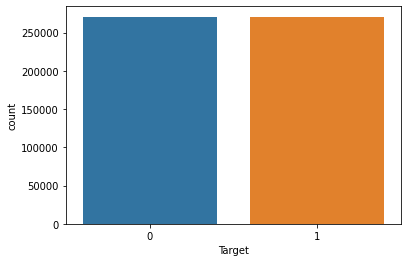

In [ ]:
ax = sns.countplot(x=yi)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)

### Criação da Máquina Preditiva

In [ ]:
#construindo o modelo
from xgboost import XGBClassifier
model = XGBClassifier()

In [ ]:
#treinando o modelo
model = model.fit(X_train, y_train)
model 

XGBClassifier()

In [ ]:
y_predict = model.predict(X_val)

## Avaliando a Máquina Preditiva

In [ ]:
#comparando gabarito e previsões da máquina
gabarito = pd.DataFrame({'Gabarito': y_val, 'Previsões da Máquina': y_predict})
gabarito 

,Gabarito,Previsões da Máquina
202757,0.0,0.0
227251,0.0,0.0
396647,1.0,1.0
453982,1.0,1.0
94317,0.0,0.0
...,...,...
430560,1.0,1.0
73519,0.0,0.0
315858,1.0,1.0
233096,0.0,0.0


In [ ]:
#evaluate model
print('Classification metrics: \n', classification_report(y_val, y_predict))
print('Acuracia: \n', accuracy_score(y_val, y_predict))
print('Confusion Matrix: \n', confusion_matrix(y_val, y_predict))

Classification metrics: 
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     81241
         1.0       0.99      0.98      0.99     81242

    accuracy                           0.99    162483
   macro avg       0.99      0.99      0.99    162483
weighted avg       0.99      0.99      0.99    162483

Acuracia: 
 0.9884418677646277
Confusion Matrix: 
 [[80767   474]
 [ 1404 79838]]


In [ ]:
#lightGBM
train_data=lgb.Dataset(X_train, label=y_train)
#setting parameters
param = {'num_leaves':1000, #numero de folhas em uma arvore; padrão = 31, type = int
         'objective ': 'binary', 
         'max_depth': 7, 
         'learning_rate':.01,
         'max_bin':200}
param['metric'] = ['auc', 'binary_logloss']

#training our model using light GBM
num_round = 50

lgbm=lgb.train(param, train_data, num_round)

In [ ]:
#passando os novos dados (Dados de teste) para o modelo 
y_predict = lgbm.predict(X_val)

### Avaliando a Máquina Preditiva


In [ ]:
gabarito = pd.DataFrame({'Gabarito': y_val, 'Previsoes da maquina': y_predict})
gabarito 


,Gabarito,Previsoes da maquina
202757,0.0,0.304344
227251,0.0,0.304344
396647,1.0,0.697016
453982,1.0,0.697016
94317,0.0,0.304474
...,...,...
430560,1.0,0.697016
73519,0.0,0.304474
315858,1.0,0.697016
233096,0.0,0.316507


In [ ]:
y_predict.size

162483

In [ ]:
#convertendo as probabilidades em zero e 1
for i in range(0,162483):
    if y_predict[i]>=.5: #setting in limite to .5
       y_predict[i]=1
    else:
       y_predict[i]=0


In [ ]:
#evaluate model
print('Classification metrics: \n', classification_report(y_val, y_predict))
print('Acuracia: \n', accuracy_score(y_val, y_predict))
print('Confusion Matrix: \n', confusion_matrix(y_val, y_predict))

Classification metrics: 
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     81241
         1.0       0.99      0.98      0.99     81242

    accuracy                           0.99    162483
   macro avg       0.99      0.99      0.99    162483
weighted avg       0.99      0.99      0.99    162483

Acuracia: 
 0.9854877125606987
Confusion Matrix: 
 [[80425   816]
 [ 1542 79700]]


### Random Forest

In [ ]:
model = RandomForestClassifier()

In [ ]:
#treinando o modelo
model = model.fit(X_train, y_train)
model 

RandomForestClassifier()

In [ ]:
# passando novos dados (dados teste ) para o modelo
y_predict = model.predict(X_val)

### Avaliando a Máquina Preditiva

In [ ]:
#comparando gabarito e previsões de maquina
gabarito = pd.DataFrame({'Gabarito': y_val, 'Previsoes da Maquina': y_predict})
gabarito 

,Gabarito,Previsoes da Maquina
202757,0.0,0.0
227251,0.0,0.0
396647,1.0,1.0
453982,1.0,1.0
94317,0.0,0.0
...,...,...
430560,1.0,1.0
73519,0.0,0.0
315858,1.0,1.0
233096,0.0,0.0


In [ ]:
#evaluate model
print('Classification metrics: \n', classification_report(y_val, y_predict))
print('Acuracia: \n', accuracy_score(y_val, y_predict))
print('Confusion Matrix: \n', confusion_matrix(y_val, y_predict))

Classification metrics: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     81241
         1.0       1.00      1.00      1.00     81242

    accuracy                           1.00    162483
   macro avg       1.00      1.00      1.00    162483
weighted avg       1.00      1.00      1.00    162483

Acuracia: 
 0.9998769101998363
Confusion Matrix: 
 [[81221    20]
 [    0 81242]]
